Reading the video and taking out its frame

In [1]:
import cv2

video=cv2.VideoCapture("file1.avi")    #opening the file
print(video.isOpened())
if video.isOpened()!=True:             #if opening is not true, video does not play
    print("Error! Video not opening")
else:
    count=0
    while True:
        success,image=video.read()      #success has true/false and images has the frame
        if success:
            name="C:/Users/vershi/OneDrive/Desktop/slablab/frame1/"+str(count)+".jpg"
            resized_image=cv2.resize(image,(320,240))  #image is resized, to make accurate (x,y)
            cv2.imwrite(name,resized_image)    #image is saved in the folder frame 1
            count=count+1
            print("image saved:"+name)
        else:
            break

print("Task completed")
video.release()   #indicates the completion of the video capture
cv2.destroyAllWindows()   #all the windows are destroyed

True
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/0.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/1.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/2.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/3.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/4.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/5.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/6.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/7.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/8.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/9.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/10.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/11.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/12.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/13.jpg
image saved:C:/Users/vershi/OneDrive/Desktop/slablab/frame1/14.jpg


Detecting the smallest ellipse in the image

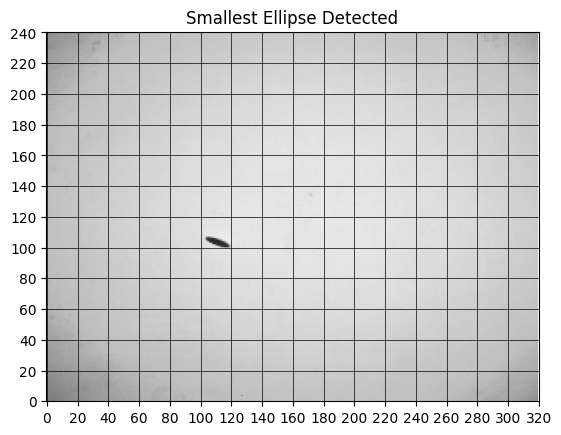

Number of edges detected: 240


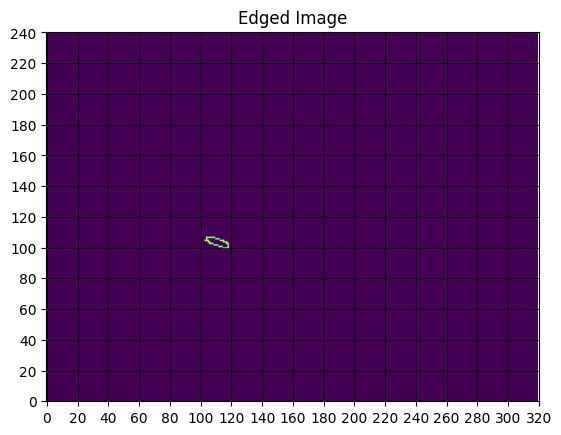

Total contours: 2
length of array of detected contours (first): 20
length of array of detected contours (Second): 19
X-axis: 111.19507598876953
Y-axis: 103.69853210449219
Major axis: 4.52377462387085
Minor axis: 15.32695198059082
Angle: 111.75875091552734


: 

In [1]:
import cv2
import csv
import numpy 
import matplotlib.pyplot as plt
import matplotlib.image as mping


def detect_smallest_ellipse(path):
    image=cv2.imread(path)    #image is being read
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)   #the image is in BGR (Blue Green Red), it is converted to gray
    #print(gray)
    blurred=cv2.GaussianBlur(gray,(5,5),0) #blurring removes noise, (5,5) is the kernal filter
    #print(blurred)
    edges=cv2.Canny(blurred,315,315)
    print("Number of edges detected:",len(edges))
    cv2.imshow("Edged image",edges)
    cv2.waitKey(0)
    plt.imshow(edges)
    xticks_values = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
    xticks_labels = ["0", "20", "40", "60", "80", "100", "120", "140", "160", "180", "200", "220", "240", "260", "280", "300", "320"]
    yticks_values = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]
    yticks_labels = ["0", "20", "40", "60", "80", "100", "120", "140", "160", "180", "200", "220", "240"][::-1]
    plt.xticks(xticks_values, xticks_labels)
    plt.yticks(yticks_values, yticks_labels)
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title('Edged Image')
    plt.show()

    contour,hierarchy=cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #contour has all the possible contours and heirarcy is the numpy array 
    print("Total contours:",len(contour))
    print("length of array of detected contours (first):",len(contour[0])) #printing the length of tuple
    print("length of array of detected contours (Second):",len(contour[1]))

    smallest_area=float("inf")  #starting smallest area with positive infinity
    smallest_ellipse=None
    smallest_coords=None

    for i in contour:
        if(len(i)):    #checking the length of array in contour(2) ,array=20/19
            ellipse=cv2.fitEllipse(i) 
            #It returns a tuple of tuples in 
            # ((x,y), 
            # (majorAxis, minorAxis), 
            # angle) format. 
            # (x,y) is the coordinates of center and 
            # (majorAxis, minorAxis) is the lengths of minor and major axes and 
            # angle is the rotation angle of the ellipse clockwise form x-axis.
        
            area=3.14*ellipse[1][0]*ellipse[1][1]
            if area<smallest_area:
                smallest_area=area
                smallest_ellipse=ellipse
    print("X-axis:",smallest_ellipse[0][0])
    print("Y-axis:",abs(smallest_ellipse[0][1]-240))
    #in the original matplotlib, the y axis starts from
    #  the top and the values come with reference to that only.
    # As i have reversed the y-axis, i subtracted the obtained value from 240 to get the original value.
    print("Major axis:",smallest_ellipse[1][0])
    print("Minor axis:",smallest_ellipse[1][1])
    print("Angle:",smallest_ellipse[2])

def display_original_image(path):
    image=cv2.imread(path)
    cv2.imshow("Original image",image)    #cv2.imshow() works only with cv2.waitKey()
    cv2.waitKey(0)
    plt.imshow(image)
    xticks_values = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320]
    xticks_labels = ["0", "20", "40", "60", "80", "100", "120", "140", "160", "180", "200", "220", "240", "260", "280", "300", "320"]
    yticks_values = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]
    yticks_labels = ["0", "20", "40", "60", "80", "100", "120", "140", "160", "180", "200", "220", "240"][::-1]
    plt.xticks(xticks_values, xticks_labels)
    plt.yticks(yticks_values, yticks_labels)
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title('Smallest Ellipse Detected')
    plt.show()

            
    

display_original_image("C:/Users/vershi/OneDrive/Desktop/slablab/frame1/1503.jpg")
detect_smallest_ellipse("C:/Users/vershi/OneDrive/Desktop/slablab/frame1/1503.jpg")


Finding the centre values for all the image frames and storing it in the points.csv file 
storing the images of circled object in folder frame 2

Processed image: 0
Processed image: 1
Processed image: 2
Processed image: 3
Processed image: 4
Processed image: 5
Processed image: 6
Processed image: 7
Processed image: 8
Processed image: 9
Processed image: 10
Processed image: 11
Processed image: 12
Processed image: 13
Processed image: 14
Processed image: 15
Processed image: 16
Processed image: 17
Processed image: 18
Processed image: 19
Processed image: 20
Processed image: 21
Processed image: 22
Processed image: 23
Processed image: 24
Processed image: 25
Processed image: 26
Processed image: 27
Processed image: 28
Processed image: 29
Processed image: 30
Processed image: 31
Processed image: 32
Processed image: 33
Processed image: 34
Processed image: 35
Processed image: 36
Processed image: 37
Processed image: 38
Processed image: 39
Processed image: 40
Processed image: 41
Processed image: 42
Processed image: 43
Processed image: 44
Processed image: 45
Processed image: 46
Processed image: 47
Processed image: 48
Processed image: 49
Processed 

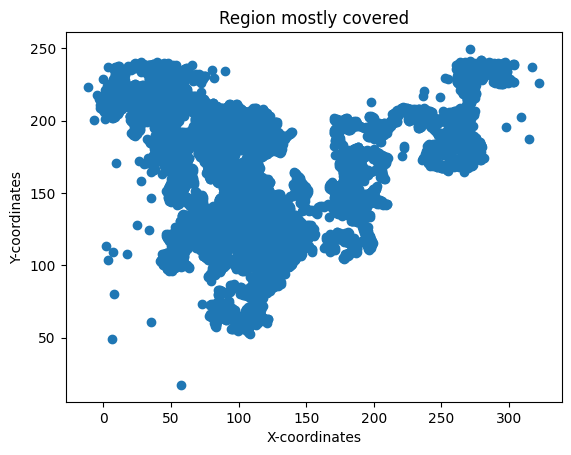

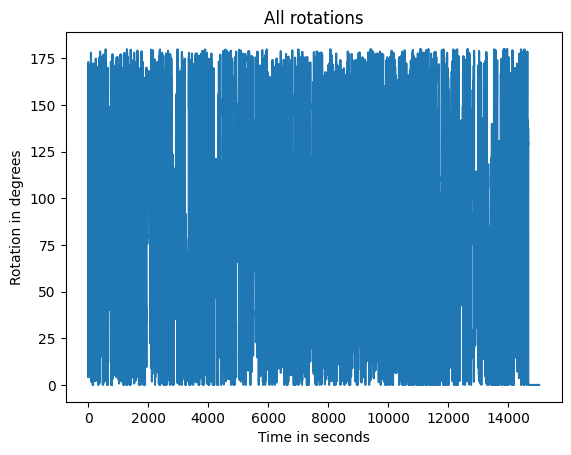

Highest value of x-axis: 322.2721862792969
Minimum value of x-axis: -11.208194732666016
Highest value of y-axis: 249.53239059448242
Minimum value of y-axis: 17.438705444335938
Highest value of rotation 180.0
Minimum value of rotation: 0.0
X- value less than 0: 20
y- value less than 0: 0


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import csv


count=15033  #taken from above
file = open("points.csv", "w+")  # Open the CSV file in write mode
file.write("x-axis,y-axis,rotation\n")  # Write the header to the CSV file
image_dir = "C:/Users/vershi/OneDrive/Desktop/slablab/frame1/"   # Define the directory path containing the images

x=[]
y=[]
rotations=[]
time=[]
for j in range(count+1):
    image=cv2.imread(image_dir+str(j)+".jpg")  #image is being read
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)   #the image is in BGR (Blue Green Red), it is converted to gray
    #print(gray)
    blurred=cv2.GaussianBlur(gray,(5,5),0) #blurring removes noise, (5,5) is the kernal filter
    #print(blurred)
    edges=cv2.Canny(blurred,315,315)
    contour,hierarchy=cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    smallest_area=float("inf")  #starting smallest area with positive infinity
    smallest_ellipse=None
    smallest_coords=None

    for i in contour:
        if(len(i)>=5):    #checking the length of array in contour(2) ,array=20/19
            ellipse=cv2.fitEllipse(i) 
            #It returns a tuple of tuples in 
            # ((x,y), 
            # (majorAxis, minorAxis), 
            # angle) format. 
            # (x,y) is the coordinates of center and 
            # (majorAxis, minorAxis) is the lengths of minor and major axes and 
            # angle is the rotation angle of the ellipse clockwise form x-axis.
        
            area=3.14*ellipse[1][0]*ellipse[1][1]
            if area<smallest_area:
                smallest_area=area
                smallest_ellipse=ellipse
                center, axes, rotation = smallest_ellipse
                smallest_coords = center, axes
    time.append(j)
    # Write the coordinates of the smallest ellipse to the CSV file if found
    if smallest_coords is not None:
        center, axes = smallest_coords
        file.write(f"{center[0]},{abs(center[1] - 240)},{rotation}\n")
        x.append(center[0])
        y.append(abs(center[1] - 240))
        rotations.append(rotation)
        cv2.ellipse(image, smallest_ellipse, (0, 255, 0), 2)

    # Convert the processed image to RGB format for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    print("Processed image:", j)
    save_path = "C:/Users/vershi/OneDrive/Desktop/slablab/frame2/"+str(j)+".jpg"

    # Save the image
    cv2.imwrite(save_path, image_rgb)


file.close()
print("Completed task")
plt.scatter(x,y)
plt.xlabel("X-coordinates")
plt.ylabel("Y-coordinates")
plt.title("Region mostly covered")
plt.show()
cv2.destroyAllWindows()

if len(time)>len(rotations):
    for k in range(len(time)-len(rotations)):
        rotations.append(0)

    plt.plot(time,rotations)
    plt.title("All rotations")
    plt.xlabel("Time in seconds")
    plt.ylabel("Rotation in degrees")
    plt.show()
print("Highest value of x-axis:",max(x))
print("Minimum value of x-axis:",min(x))
print("Highest value of y-axis:",max(y))
print("Minimum value of y-axis:",min(y))
print("Highest value of rotation",max(rotations))
print("Minimum value of rotation:",min(rotations))

count1=0
for i in x:
    if i<0:
        count1+=1
print("X- value less than 0:",count1)

count2=0
for i in y:
    if i<0:
        count2+=1
print("y- value less than 0:",count2)

Reading the frames from folder frame2 and looking at the video

In [4]:
import cv2

count=15033
for i in range(count+1):
        image_file = "C:/Users/vershi/OneDrive/Desktop/slablab/frame2/"+str(i)+".jpg"
        image = cv2.imread(image_file)
        if image is None:
            print(f"Image {image_file} not found or cannot be loaded.")
            continue

        # Display the image
        cv2.imshow('Image Sequence', image)

        # Wait for 30 milliseconds (you can adjust this value to change the speed)
        # Exit if 'q' key is pressed
        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

    
    
cv2.destroyAllWindows()
